Chi Square Test

In [2]:
import numpy as np

observed = np.array([
    [250, 200],
    [50, 1000]
])

expected = np.array([
    [90, 360],
    [210, 840]
])

chi_square = ((observed - expected)**2 / expected ).sum()
print(f"Chi-square value: {chi_square:.4f}")

Chi-square value: 507.9365


In [4]:
from scipy.stats import chi2_contingency

chi2, p, dof, exp = chi2_contingency(observed, correction= False)

print(f"Chi-square: {chi2:.4f}")
print(f"p-vlaue: {p:.6f}")
print(f"Degree of freedom: {dof}")
print(f"Expected value: {exp}")

if p < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Chi-square: 507.9365
p-vlaue: 0.000000
Degree of freedom: 1
Expected value: [[ 90. 360.]
 [210. 840.]]
Reject H0


In [ ]:
from scipy.stats import chisquare

observed = []
expected = [22] * 6

chi_stat, p_value = chi_square(f_obs = observed, f_exp = expected)


Regression

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Generate values from 0 to 30 with 0.27 increment 
X = np.arange(0, 30, 0.27)

# View the values from X (first 3 values)
print(X[0:4])

# Generate y
y = 0.1999*X + 4.2999

print(y[0:4])

print(X.shape, y.shape)

[0.   0.27 0.54 0.81]
[4.2999   4.353873 4.407846 4.461819]
(112,) (112,)


In [11]:
split = int(X.shape[0]*0.8)
print(split)

89


In [12]:
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

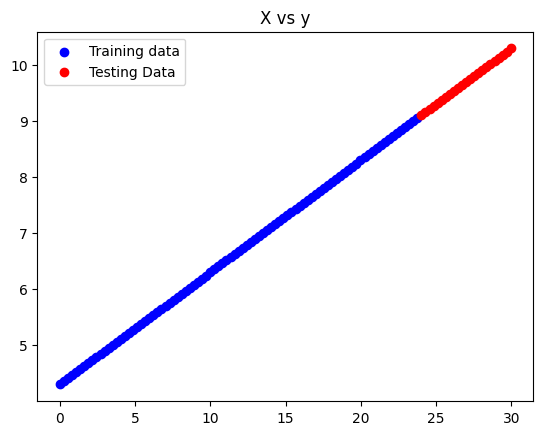

In [15]:
def plot_data(X_train = X_train, X_test = X_test, y_test = y_test, y_train = y_train, predictions = None):
    plt.scatter(X_train, y_train, c = 'b', label = "Training data")
    plt.scatter(X_test, y_test, c = 'r', label = "Testing Data")
    if predictions is not None:
        plt.plot(X_test, predictions, c = 'g', label = "Predictions")
    plt.legend()
    plt.title("X vs y")
    plt.show

plot_data()

In [16]:
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)
cov_x_y = (1/X_train.shape[0]) * np.sum((X_train - X_mean) * (y_train - y_mean))
cov_x = (1/X_train.shape[0]) * np.sum(np.square(X_train - X_mean))
m = cov_x_y / cov_x
c = y_mean - m*X_mean
print(f"y = {m}*X + {c}")

y = 0.1999*X + 4.2999


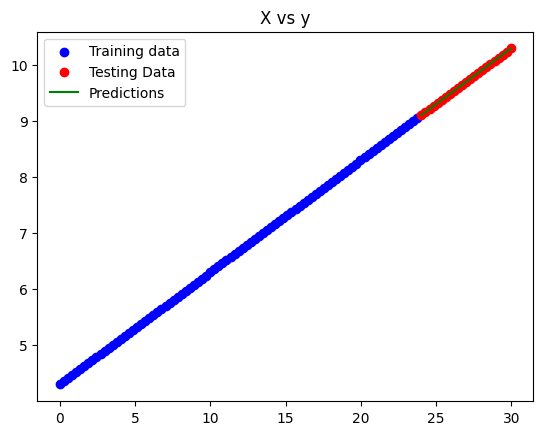

In [17]:
y_preds = m*X_test + c
plot_data(predictions= y_preds)